## Steps required to complete the Machine learning Project
* Understanding the Objective / Business Understanding
* Data Understanding
* Data Collection/Loading (Either from CSV of from SQL databases)
* Data Cleaning
* Data Visualization (EDA)
* Data Pre-Processing / Manipulation
* Data Split-up (Train and Test)
* Model Training
* Choose best model
* Improve model results (Hypertuning)

## 1. Objective
* This data was extracted from the 1994 Census bureau database.  
* Task is to determine whether a person makes an income over 50K a year.

## 2. Data Understanding
* The Dataset is curated from UCI Machine Learning Repository.
* Link for dataset - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

### Variables:
* __Age__: continuous.Age of the individual
* __Workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __Final_weight__: continuous. 
* __Education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __Education_level__: continuous.
* __Marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __Occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __Relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __Race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __Sex__: Female, Male.
* __Capital_gain__: continuous.
* __Capital_loss__: continuous.
* __Hours_per_week__: continuous.
* __Native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* __Income_class__:<=50K as 0 and >50K as 1       


In [1]:
#### Importing Libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import scikitplot as skl
sns.set()

# Hide python warning
import warnings
warnings.filterwarnings("ignore")

# export/store model
import pickle

# data preparation
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# data split
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression

# model evaluation / accuracy / results
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## 3. Data Loading

In [62]:
df1 = pd.read_csv(r'adult.data' ,names = ['Age','Workclass','Final_weight','Education','Education_level','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income_class'])

In [63]:
df1.head(3)

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [64]:
df2 = pd.read_csv(r'adult.test',names = ['Age','Workclass','Final_weight','Education','Education_level','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income_class'])

In [67]:
df2.head(3)

,Age,Workclass,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.


## 4. Data Cleaning

### 4.1 Remove irrelevant data
#### First row has lot of missing values, So let's Remove the First row from df2 dataframe. 

In [68]:
df2.drop(index = 0 ,inplace = True)
df2.reset_index(inplace =True ,drop = True)

#### Combining Both dataframes df1 and df2 into single dataframe

In [69]:
df = pd.concat([df1, df2],axis=0)

### 4.2 Missing value treament 
#### We have few missing values in our datset represented by "?" instead of NaN  "?" . Let's change it to null.

In [70]:
df.replace(' ?',np.nan,inplace= True)

In [71]:
# detect missing values using pandas library
df.isnull().sum()/df.shape[0]

Age                0.000000
Workclass          0.057307
Final_weight       0.000000
Education          0.000000
Education_level    0.000000
Marital_status     0.000000
Occupation         0.057512
Relationship       0.000000
Race               0.000000
Sex                0.000000
Capital_gain       0.000000
Capital_loss       0.000000
Hours_per_week     0.000000
Native_country     0.017546
Income_class       0.000000
dtype: float64

#### If we have missing values less than 5% better to remove it. Let's do it!

In [72]:
# remove missing values/rows 
df.dropna(inplace = True)

In [73]:
# Once we remove missing values (a.k.a rows) indexing will not be in a proper order, so we need to reindex
df.reset_index(inplace =True ,drop = True)

In [74]:
# Let's re-check the missing values 
df.isnull().sum()

Age                0
Workclass          0
Final_weight       0
Education          0
Education_level    0
Marital_status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital_gain       0
Capital_loss       0
Hours_per_week     0
Native_country     0
Income_class       0
dtype: int64

#### Interpretation: Here we can see that we don't have missing values anymore. so Let's move on to next step

### 4.3 Duplicate values

In [75]:
# check duplicate values
df.duplicated().sum()

28

In [76]:
# Now drop duplicate values
df.drop_duplicates(inplace= True)

In [77]:
# Again as we have removed few in-between rows, we need to re-index the remaining rows
df.reset_index(inplace =True ,drop = True)

### 4.4 Correcting the dtypes of int variables

In [16]:
df.dtypes

Age                 object
Workclass           object
Final_weight       float64
Education           object
Education_level    float64
Marital_status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital_gain       float64
Capital_loss       float64
Hours_per_week     float64
Native_country      object
Income_class        object
dtype: object

##### Converting Age Feature to integer data type

In [78]:
df['Age'] = df['Age'].astype(int)

In [80]:
df.dtypes

Age                  int32
Workclass           object
Final_weight       float64
Education           object
Education_level    float64
Marital_status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital_gain       float64
Capital_loss       float64
Hours_per_week     float64
Native_country      object
Income_class        object
dtype: object

## 4.4 Correcting categories of target variable

* The target variable is Income_class which has 2 categories **<=50K** and **>50K** 
* It denotes Salaries of the Individuals, we are going to encode <=50K as __0__ and >50K as __1__

In [81]:
print(df['Income_class'].unique())
# Correct and encode to 0 and 1
df['Income_class'] = df['Income_class'].map({" <=50K": 0," <=50K.":0," >50K.":1," >50K":1})
print('Corrected class labels: ' ,df['Income_class'].unique())

[' <=50K' ' >50K' ' <=50K.' ' >50K.']
Corrected class labels:  [0 1]


In [83]:
df.Income_class.value_counts()

0    33988
1    11206
Name: Income_class, dtype: int64

 # 5. EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45194 entries, 0 to 45193
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              45194 non-null  int32  
 1   Workclass        45194 non-null  object 
 2   Final_weight     45194 non-null  float64
 3   Education        45194 non-null  object 
 4   Education_level  45194 non-null  float64
 5   Marital_status   45194 non-null  object 
 6   Occupation       45194 non-null  object 
 7   Relationship     45194 non-null  object 
 8   Race             45194 non-null  object 
 9   Sex              45194 non-null  object 
 10  Capital_gain     45194 non-null  float64
 11  Capital_loss     45194 non-null  float64
 12  Hours_per_week   45194 non-null  float64
 13  Native_country   45194 non-null  object 
 14  Income_class     45194 non-null  int64  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 5.0+ MB


#### Create Seperate list of Numerical and Categorical variables

In [20]:
sample_list = ['Age', 'Final_weight']
    
num_feat = [fea for fea in df.columns if df[fea].dtype != object]
cat_feat = [fea for fea in df.columns if df[fea].dtype == object]
print(" We have {} Numerical features : {}".format(len(num_feat), num_feat))
print(" We have {} Categorical features : {}".format(len(cat_feat), cat_feat))

 We have 7 Numerical features : ['Age', 'Final_weight', 'Education_level', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income_class']
 We have 8 Categorical features : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


## 5.1 Statistical description

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,45194.0,38.551755,13.215806,17.0,28.00,37.0,47.0,90.0
Final_weight,45194.0,189737.853056,105640.654414,13492.0,117392.25,178312.0,237903.0,1490400.0
Education_level,45194.0,10.119109,2.552057,1.0,9.00,10.0,13.0,16.0
Capital_gain,45194.0,1102.112736,7508.705003,0.0,0.00,0.0,0.0,99999.0
Capital_loss,45194.0,88.650308,405.075515,0.0,0.00,0.0,0.0,4356.0
Hours_per_week,45194.0,40.941209,12.006449,1.0,40.00,40.0,45.0,99.0
Income_class,45194.0,0.247953,0.431829,0.0,0.00,0.0,0.0,1.0


__Interpretation__
* std/variance of any of the variables is not close to 0 it means that all the variables are important, more detailed understanding we will see using correlation and feature selection methods
* capital_loss, capital_gain and Final_weight variables statistics says data spread. 

## 5.2 Univariate Analysis 

### Histogram

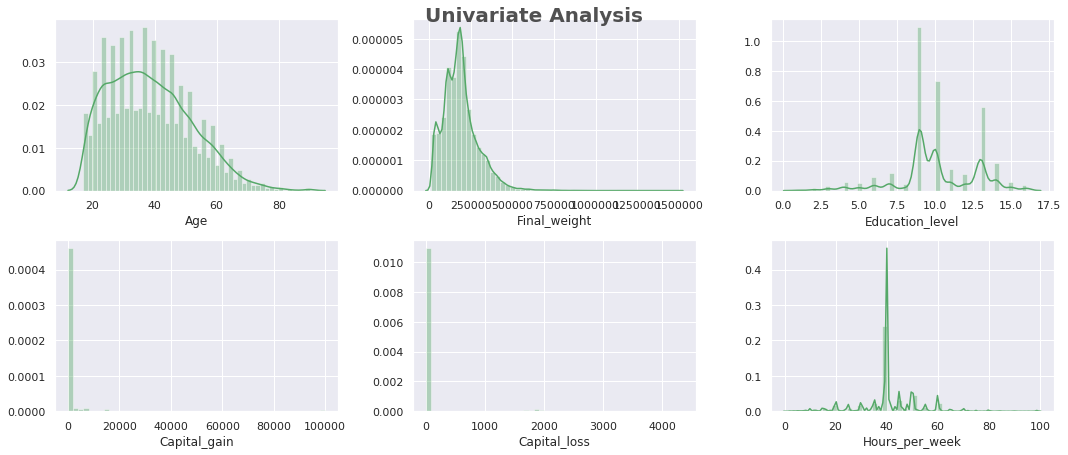

In [45]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.distplot(df[num_feat[i]], color='g')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

__Interpretation__
* Age is aprroximately normally distributed.
* Final weight,capital loss & capital gain are heavily right skewed.


### Counter plot 

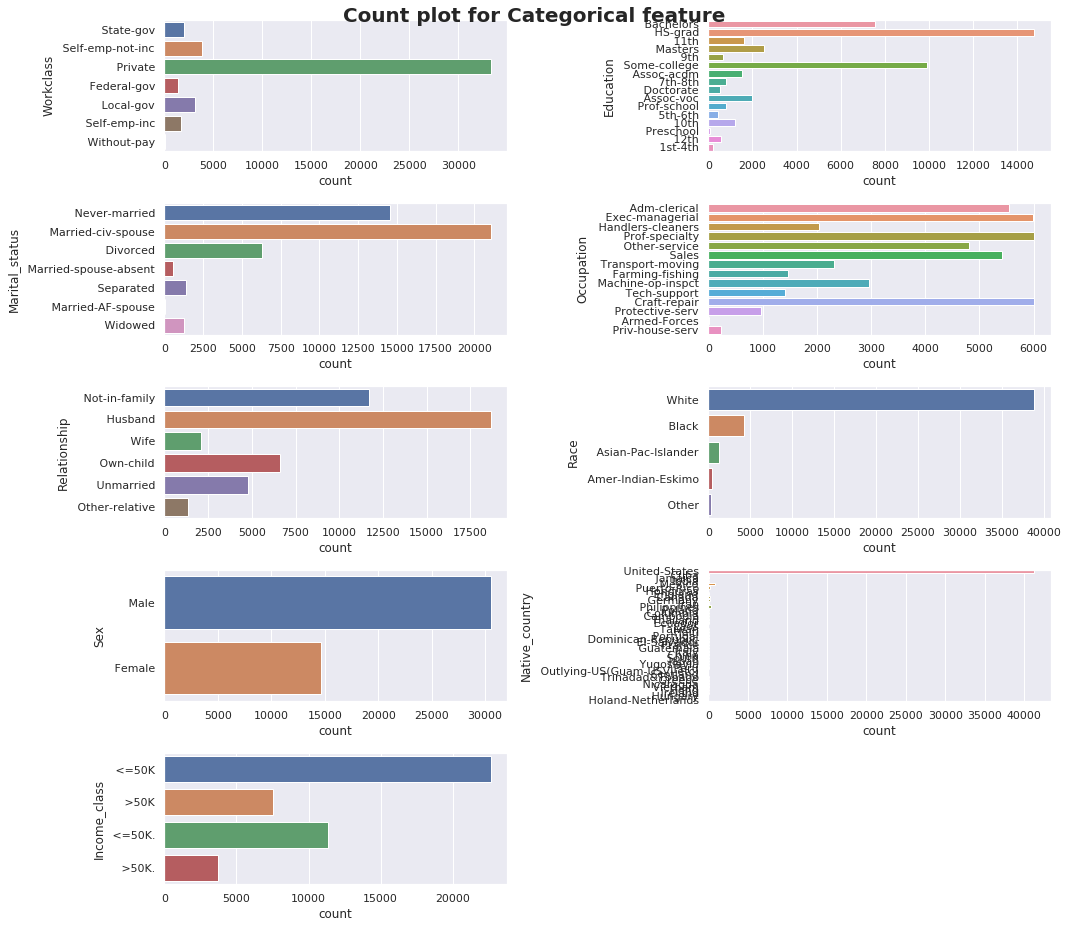

In [46]:
# Understand categorical variables frequency distributions in our data
plt.figure(figsize=(15, 20))
plt.suptitle('Count plot for Categorical feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(cat_feat)):
    plt.subplot(8, 2, i+1)
    sns.countplot(y=cat_feat[i], data=df)
    plt.tight_layout()

## 5.3 Bivariate Analysis

#### Correlation

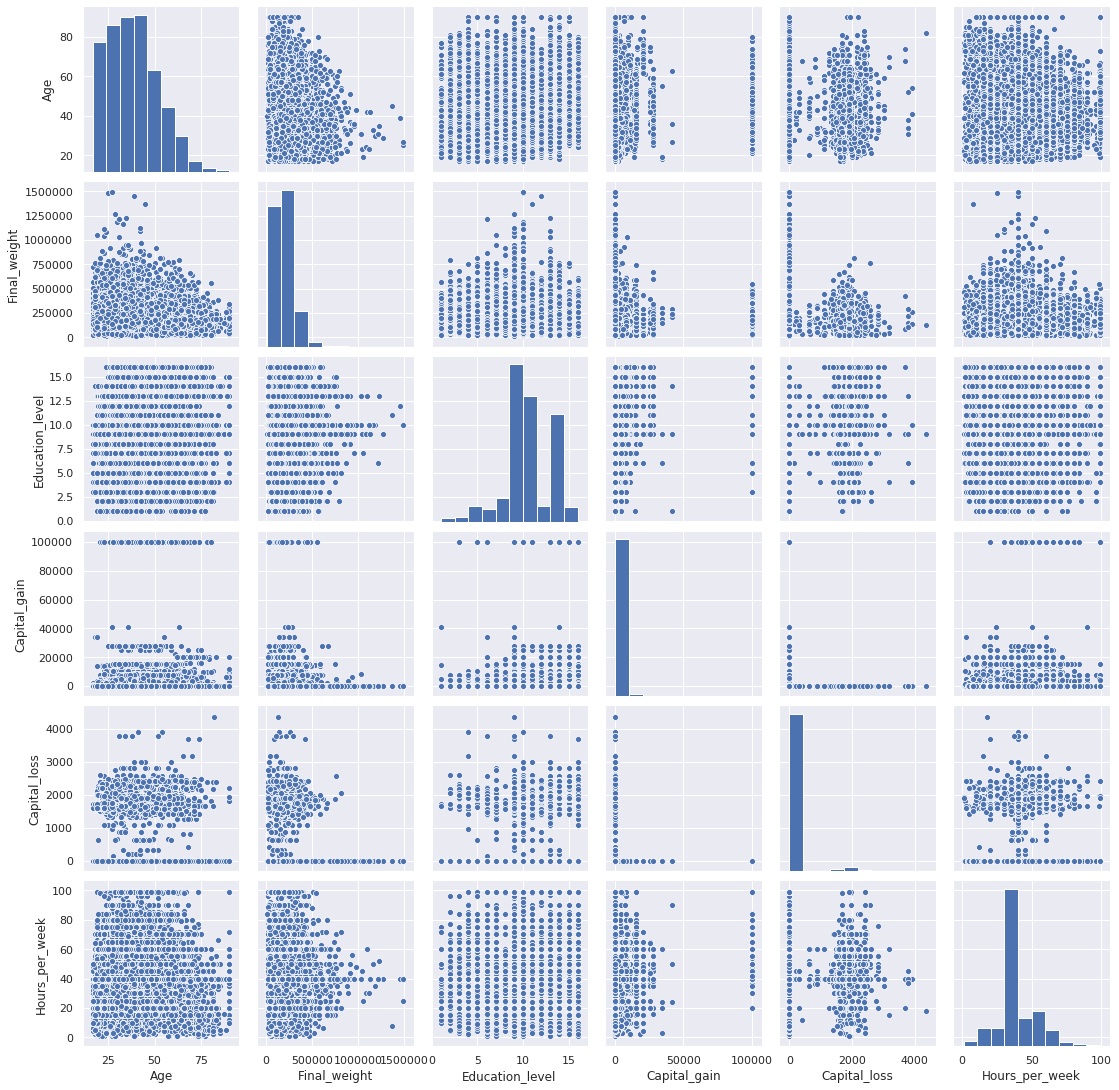

In [48]:
# correlation using pair plot
sns.pairplot(df)

<AxesSubplot:>

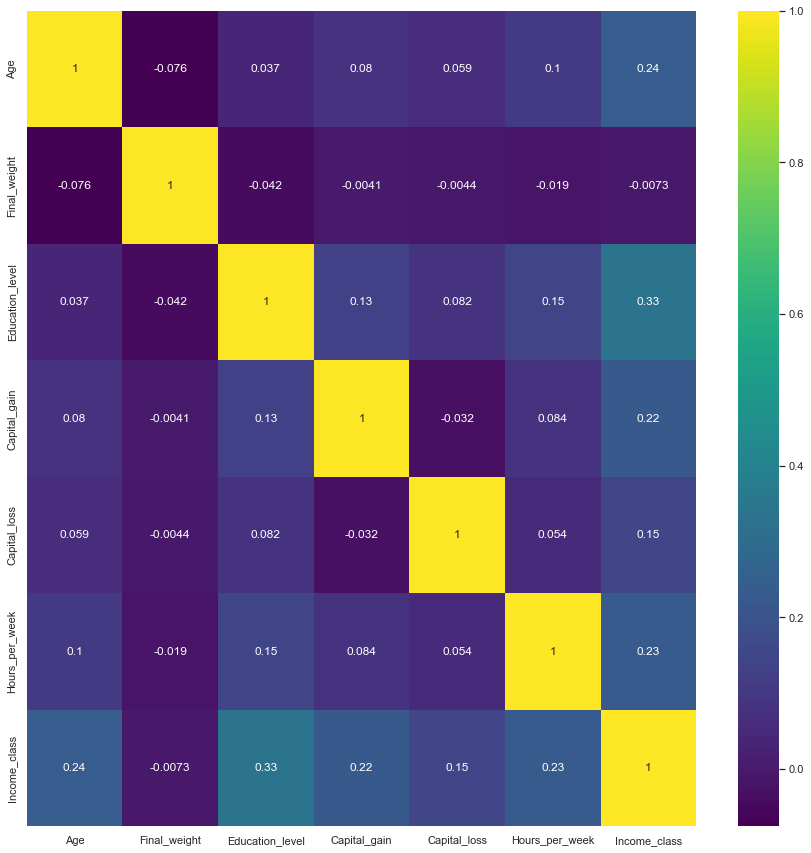

In [38]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap = 'viridis')

__Interpretation:__  
* There is very low correlation between the features.
* Final_weight has lowest correlation with rest of the Features.
* The highest Correlation is between Education_level and Income_Class equal to 0.33

## 5.4 Freq Distribution of Categorical variables

#### Freq Distribution w.r.t Output Variable

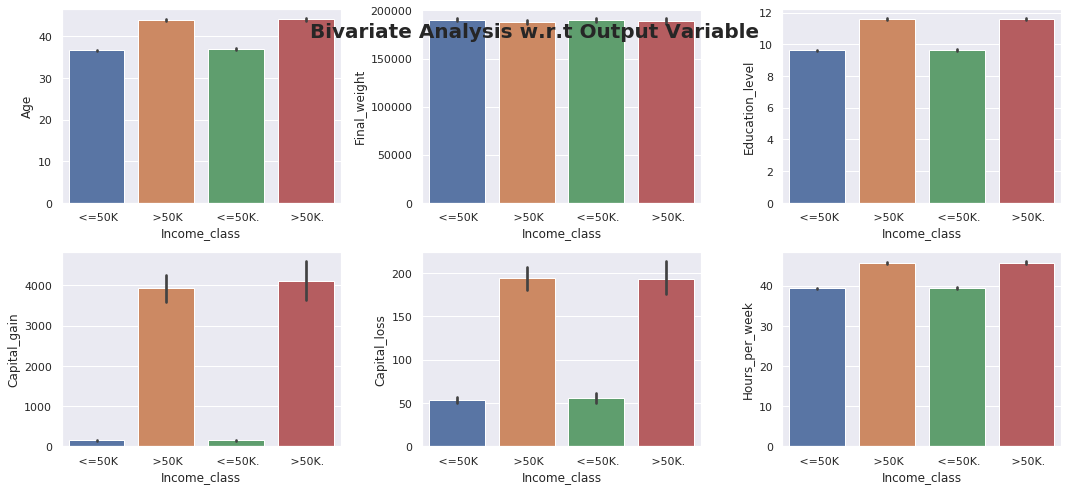

In [56]:
plt.figure(figsize=(15,20))
plt.suptitle('Bivariate Analysis w.r.t Output Variable', fontsize=20, fontweight='bold')
for i in range(0, len(num_feat)):
             plt.subplot(6, 3, i+1) 
             sns.barplot(y=num_feat[i], x='Income_class', data = df)
             plt.tight_layout()

__Income based on Occupation__

<AxesSubplot:xlabel='Income_class', ylabel='count'>

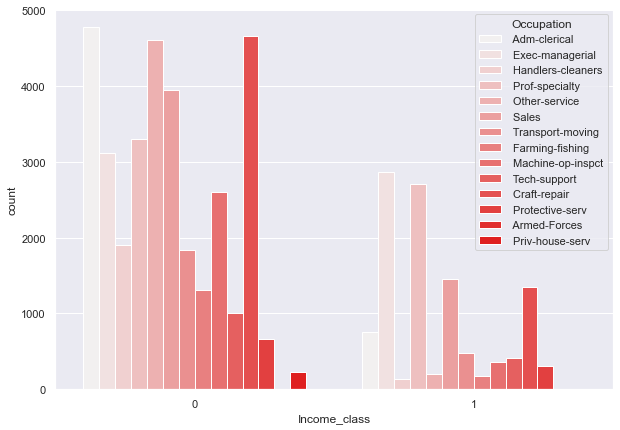

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x='Income_class', hue='Occupation', data=df, color='red')

### Counter plot of Workclass and Income_Class

<AxesSubplot:xlabel='Workclass', ylabel='count'>

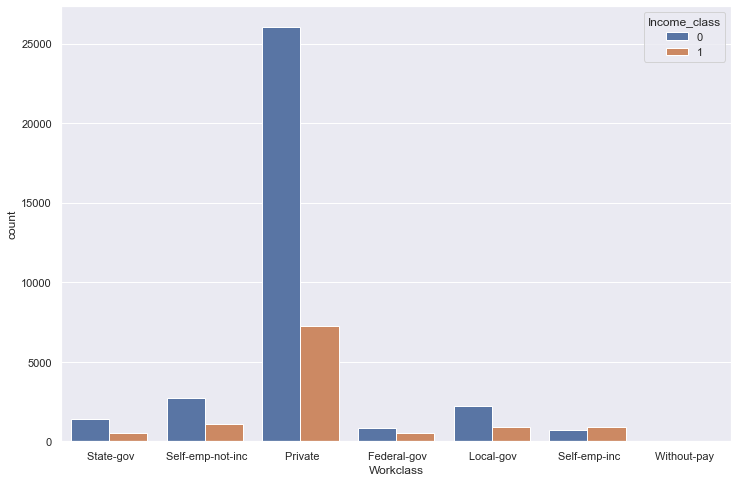

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Workclass', hue='Income_class')

__Interpretation:__  
There are more Private employees getting income more than 50k followed by self employed


### Counter plot of Marital_Status and Income_Class

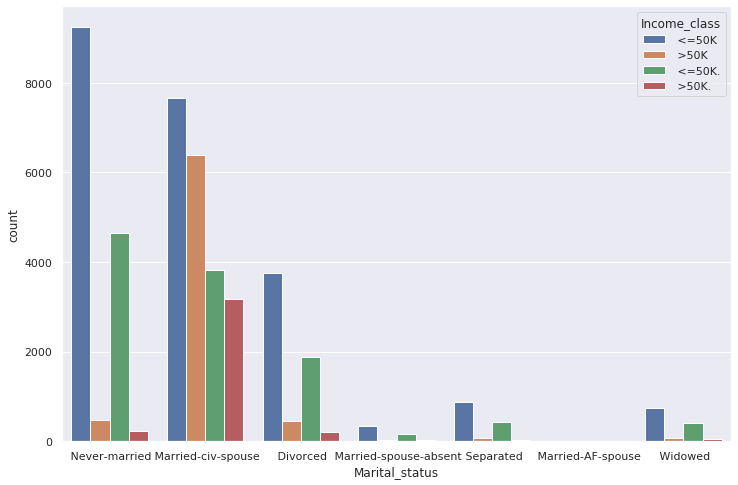

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Marital_status', hue='Income_class')

__Interpretation:__  
* More number of Married person have income above 50k than others
* Maximum Never maried person have income less than 50 k

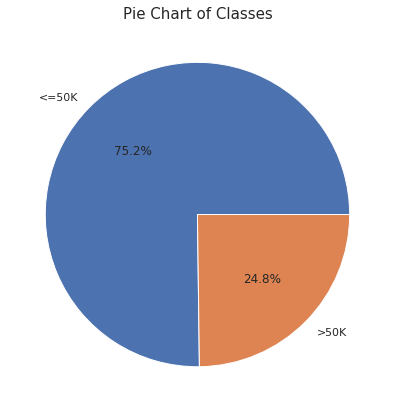

In [82]:
percentage=df.Income_class.value_counts(normalize=True)*100
classes_labels=['<=50K','>50K']
plt.figure(figsize=(7,7))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

__Interpretation:__  
* More than 75% of people have Income less than or equal to 50K

## 5.5 Outliers

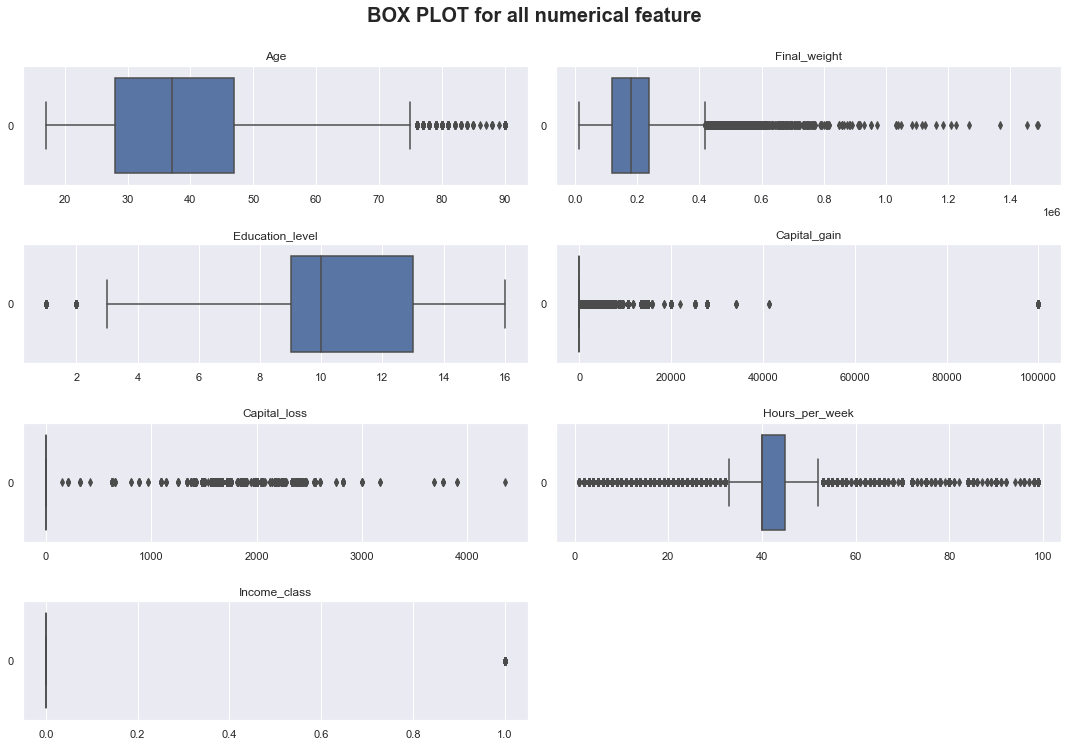

In [45]:
plt.figure(figsize=(15, 20))
plt.suptitle('BOX PLOT for all numerical feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_feat)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(data=df[num_feat[i]],orient='h')
    plt.title(label = num_feat[i])
    plt.tight_layout()

__Interpretation:__
* Final_weight, Capital_gain, Capital_loss, Hours_per_week  and Income_Class has higher outliers. 
* We can use IQR method to treat outliers. (To Be Done)

### Saving the  Data to a csv file

In [84]:
df.to_csv('Cleaned_census_data.csv')

# 6. PreProcessing

### 6.1 Label Encoding


In [84]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

### 6.2 Split Train and Test Data 

In [85]:
# Input and Output features
X = df.drop(['Income_class'], axis=1)
y = df.Income_class

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [87]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((30279, 14), (30279,), (14915, 14), (14915,))

### 6.3 Feature Scaling

In [88]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [89]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

# 7. Model Training

## 7.1 Logistic Regression

In [111]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [112]:
# Prediction
y_pred = log_reg.predict(X_test)

### Performance Metrics
* Accuracy Score
* Confusion matrics
* Classification Report - Precision, Recall, f1-Score and Support
* AUC
* ROC

In [113]:
# Accuracy score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7881327522628226

In [31]:
# Confusion matrix and Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11314
           1       0.70      0.46      0.56      3601

    accuracy                           0.82     14915
   macro avg       0.77      0.70      0.72     14915
weighted avg       0.81      0.82      0.81     14915



In [33]:
# AUC
auc = roc_auc_score(y_test, y_pred)
auc

0.698767202086785

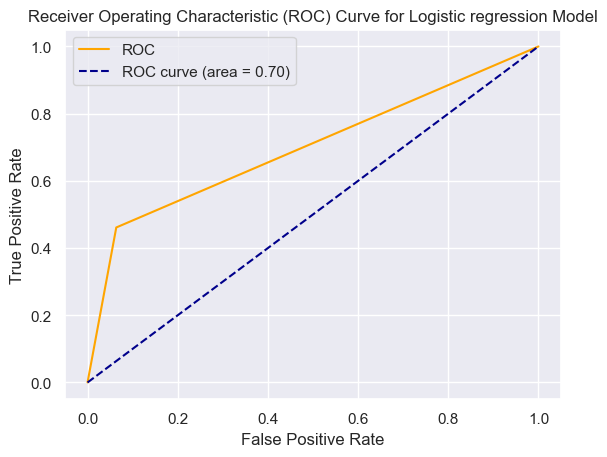

In [34]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic regression Model')
plt.legend()
plt.show()

## SVC Model

In [35]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled,y_train)

SVC()

##### Prediction

In [36]:
y_pred_svc = svc_model.predict(X_test_scaled)

In [37]:
# Accuracy score
accuracy_svc = accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.8451894066376131

In [38]:
# classification report
cr = classification_report(y_test,y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11314
           1       0.73      0.56      0.64      3601

    accuracy                           0.85     14915
   macro avg       0.80      0.75      0.77     14915
weighted avg       0.84      0.85      0.84     14915



In [39]:
# AUC
auc_svc = roc_auc_score(y_test, y_pred_svc)
auc_svc

0.7489677164784966

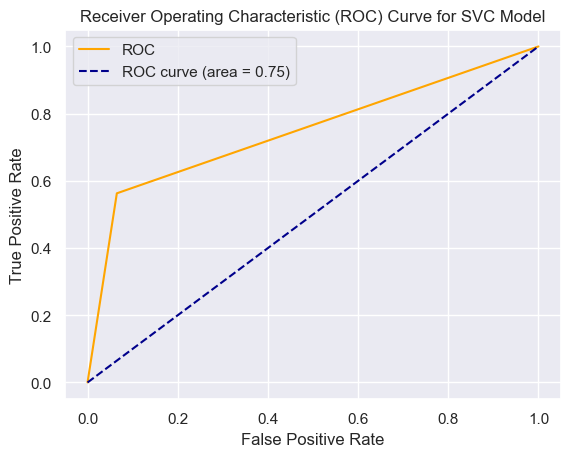

In [40]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_svc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC Model')
plt.legend()
plt.show()

## Decision Tree Classifier Model

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy')

In [109]:
# Prediction
y_pred_dt = dt_model.predict(X_test_scaled)

In [110]:
# Accuracy
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.8108615487763996

In [44]:
# Classification report
cr = classification_report(y_test,y_pred_dt)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     11314
           1       0.60      0.63      0.61      3601

    accuracy                           0.81     14915
   macro avg       0.74      0.75      0.74     14915
weighted avg       0.81      0.81      0.81     14915



In [45]:
# AUC
auc_dt = roc_auc_score(y_test, y_pred_svc)
auc_dt

0.7489677164784966

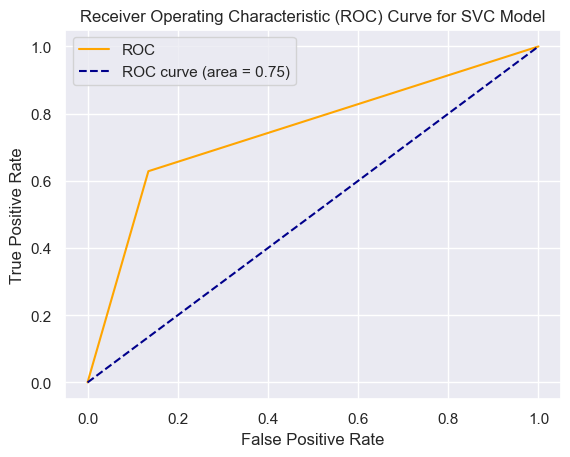

In [46]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC Model')
plt.legend()
plt.show()

## Compare and Choose best fit model

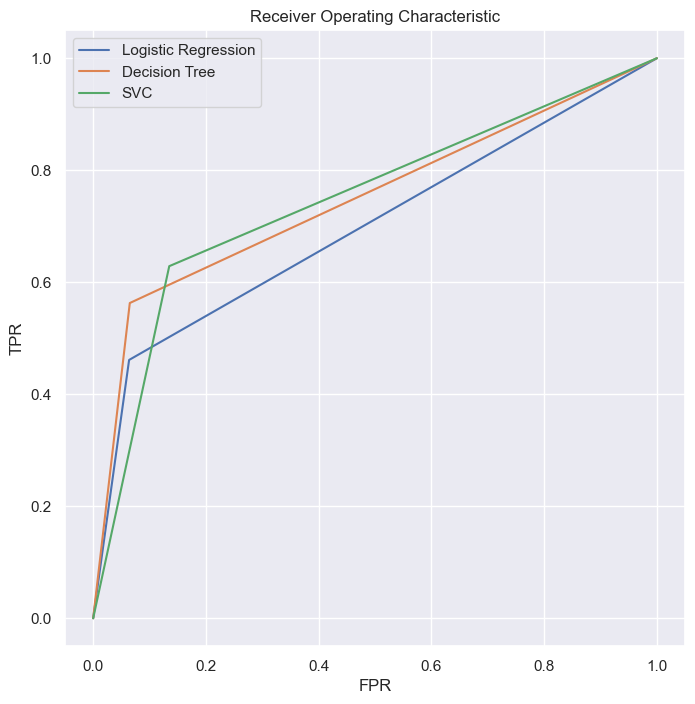

In [47]:
plt.figure(figsize=(8,8))
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_svc)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_dt)

plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "SVC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

### Interpretation
**SVC** model is the performed the best amoung other models as it has the Highest Accuracy as well as Highest Area under Curve. 

Now time is to improve the choosen model using Hyper Parameter tuning. Hyperparameter tuning means choosing the best fit parameters instead of using random parameters or default parameters  


# 8. HyperParameter Tuning

Grid Search CV on SVC model

In [48]:
# parameters
param= {'C':[1,2,10,100],'gamma':[0.1,0.5,1]}

In [ ]:
grid_svc = GridSearchCV(svc_model, param_grid=param, scoring='accuracy', cv=5)
grid_svc.fit(X_train_scaled,y_train)

In [ ]:
grid_svc.best_params_

## Building a SVC model with best parameters

In [114]:
svc_model_hyper=SVC(kernel='rbf',C= 2, gamma= 0.1)
svc_model_hyper.fit(X_train_scaled,y_train)

SVC(C=2, gamma=0.1)

In [115]:
# new predictions 
y_pred_svc_hyper = svc_model_hyper.predict(X_test_scaled)

In [116]:
print("Accuracy Score:", accuracy_score(y_pred_svc_hyper,y_test))
print("Classification Report:\n",classification_report(y_pred_svc_hyper,y_test))

Accuracy Score: 0.8470667113643983
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90     12079
           1       0.58      0.73      0.65      2836

    accuracy                           0.85     14915
   macro avg       0.76      0.80      0.77     14915
weighted avg       0.87      0.85      0.85     14915



## Let's save the final model

In [117]:
import pickle
# Writing different model files to file
with open('Hypertuned_svc.sav', 'wb') as f:
    pickle.dump(svc_model_hyper,f)

In [118]:
# load saved model and do predictions
with open('Hypertuned_svc.sav' , 'rb') as f:
    svc_model_ = pickle.load(f)

In [119]:
# prediction on test data with loaded model svc_model_
y_pred_ = svc_model_.predict(X_test_scaled)

In [56]:
accuracy_score(y_test,y_pred_)

0.8470667113643983